# PHAS0029 Session 9:       The  Discrete Fourier Transform and Fast Fourier Transform

louise.dash@ucl.ac.uk Last updated 06.02.2020

In PHAS0025 (MMIII) you learned about the Fourier Series and the Fourier Transform. In this session we're going to look at methods of using these techniques numerically - and in particular for the Discrete Fourier Transform (often known as the DFT) and the Fast Fourier Transform (FFT), which is a particularly efficient algorithm to implement the DFT.

You'll remember the form of the Fourier transform as given in PHAS0025:

$$ g(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{+\infty} f(t) e^{i\omega t} dt $$

and also that its main purpose is to transform from the time domain to the frequency domain.

We can already use numerical techniques here, for example by performing the integration numerically using the trapezoidal rule. But what happens if we don't have full knowledge of $f(t)$ - for example if the data we want to transform is discrete, digital, or sampled only at certain values of $t$? This is where the discrete Fourier transform steps in.

## The discrete Fourier transform (DFT)

We won't cover a full derivation of the DFT here (it is covered in most computational physics textbooks, for example Newman *Computational Physics* Chapter 7), but the following gives an outline derivation. 

We'll also use a more general notation $f(x)$ rather than $f(t)$.

We already know that we can represent a periodic function in terms of a Fourier series. In general however, we're dealing with functions $f(x)$ that are *non-periodic*. This isn't as problematic as it might seem, as we can take a portion of our non-periodic function over an interval from $0$ to $L$ and repeat it infinitely in both directions to form a periodic function of period $L$. Clearly, the results will be incorrect outside this region, but if the only portion we're interested in is that from $0$ to $L$, all is OK.

In this case, we can represent our function $f(x)$ as a complex Fourier series

$$
f(x) = \sum_{k = -\infty}^{\infty} \gamma_k \exp \left(2 \pi i \frac{k x}{L}\right),
$$
with the coefficients $\gamma_k$ given by
$$ 
\gamma_k = \frac{1}{L} \int_0^L f(x) \exp \left(-2 \pi i \frac{k x}{L}\right) dx.
$$



We can evaluate the integral using the trapezoidal rule with $N$ slices (where $N$ is the number of samples we have for $f(x)$ in the interval $0 < x < L$), which gives us

$$
\gamma_k = 
\frac{1}{N} \sum_{n=0}^{N-1} f(x_n) \exp \left( - 2\pi i \frac{k x_n}{L} \right).
$$


Now if we have a set of sampled data $y_n = f(x_n)$ instead of the full $f(x)$, we can rewrite this as

$$
\gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \exp \left(- 2\pi i \frac{k n}{N} \right),
$$

as the sampling points $x_n$ are specified by $x_n = n L / N$.

By convention, the factor $1/N$ is dropped from the definition of the discrete Fourier transform (instead, it appears in the inverse discrete Fourier transform), giving the standard form of the **Discrete Fourier Transform**:

$$
c_k = \sum_{n=0}^{N-1} y_n \exp \left(- 2\pi i \frac{k n}{N} \right).
$$

(see, for example, the numpy documentation at http://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft)

## The DFT in two dimensions

The same principle holds in two (or more) dimensions. In this case the summation is performed first in one dimension, then in the other. For example, for a two-dimensional $M \times N$ grid of sampled data $y_{mn}$, the DFT becomes

$$
c_{kl} = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} y_{mn} \exp \left( - 2 \pi i \left[ \frac{km}{M} + \frac{ln}{N} \right] \right)
$$

This two-dimensional transform is widely used for image processing, particularly in astronomy.

## Implementing the DFT

Now we've done the theory bit, we can implement the one-dimensional DFT in python fairly simply. We'll start by importing the usual modules:

In [4]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


We'll implement the DFT using a function to find the $N$ coefficients we need to describe the function $f(x_n) = y_n$. Bear in mind that our coefficients $c_k$ are, in general, complex. We haven't covered complex numbers in Python much, but fortunately they're fairly easy to cope with. $\sqrt{-1}$ is represented by an engineers' `j` rather than $i$, and in order to represent an imaginary number, you suffix it with a `j`, like this:

In [1]:
1j*1j # calculate i*i 

(-1+0j)

We can see how this works in the following function, which calculates the (complex) coefficients $c_k$ for the DFT:

In [2]:
def dft_1d(y):
    '''Simple implementation of the discrete Fourier transform in 1D
    Input: array of N sample values y
    Output: array of N-1 Fourier coefficients'''
    N = len(y)
    c = np.zeros(N, complex)   # set up an array of complex numbers, filled with 0s
    for k in range(N):         # loop over all N coefficients (runs from 0 to N-1)
        for n in range(N):     # calculate this coefficient.
            c[k] = c[k] + y[n]*np.exp(-2j*np.pi*k*n/N) # 2j: imaginary 2
    return c                   # return an array of coefficients

Let's test this, using a sample from a data file. Make sure you've downloaded the file "pitch.txt" from Moodle, then we'll load it and plot it to see what it looks like.

The data file has  1024  sample points


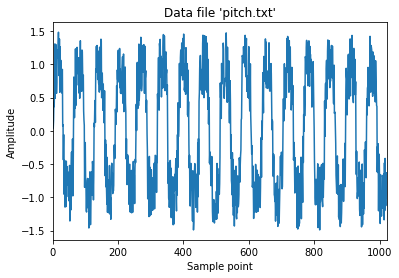

In [10]:
y = np.loadtxt("pitch.txt",float) # import floats from the data file

print("The data file has ", len(y), " sample points")

plt.figure()
plt.xlabel('Sample point')
plt.ylabel('Amplitude')
plt.title("Data file 'pitch.txt'")
plt.xlim(0,1024)
plt.plot(y);

We can see that the data represents a function that looks fairly periodic, but quite noisy. Let's transform it, using our function. As the coefficients are complex, we'll plot their absolute value. We'll also only plot the lowest 500 coefficients (corresponding to the lowest frequencies).

We've calculated 1024 Fourier coefficients


C:\Users\Shameer\Anaconda3new\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


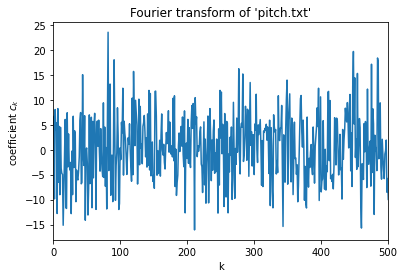

In [16]:
c = dft_1d(y) # calculate the Fourier coefficients
x = np.linspace(0,1024,1024)
print("We've calculated", len(c), "Fourier coefficients")
plt.figure()
plt.xlim(0,500)
plt.plot(x,c) # plot the absolute coefficients
plt.title("Fourier transform of 'pitch.txt'")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

We can see that the data does indeed consist of a base frequency, or fundamental, with $k\sim 15$, with a few higher harmonics and plenty of noise from other frequencies. Note that the fundamental frequency is the _lowest_ Fourier component, not necessarily the largest Fourier component. The Fourier components are effectively a "signature" of the sound (for audio data), or the image (for two-dimensional image data) and contain a lot of information.

Maybe you noticed this took a second or two to compute. Let's look at why. In our implementation of the DFT, we have a double loop over $N$, meaning we need to do $N^2$ calculations to do the transform. If $N$ is big, this is going to get very slow very quickly.

## The Fast Fourier Transform



Fortunately, there's already a much more efficient algorithm for this, which is known as the **Fast Fourier Transform** or **FFT**. We're not going to go into the details of this here (if you want to know more, you can read http://dx.doi.org/10.1090/S0025-5718-1965-0178586-1), and even better, it's already implemented in Python, so we don't even need to implement the algorithm ourselves, but can just get on with using it.

(Technical aside: The FFT routines are implemented both in numpy and in scipy. They are slightly different, but for most of the stuff we'll be using them for here it doesn't make any difference, so we'll just use the numpy versions for convenience. You can read more about the relationship between numpy and scipy ("It's complicated") here: http://stackoverflow.com/questions/6200910/relationship-between-scipy-and-numpy?rq=1)


Let's use fft to recalculate the transform of the data we looked at earlier. We'll use the numpy [rfft](http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.rfft) routine, which is part of the fft module, to do the transform. The 'r' here is for real - as we are only dealing with real sample functions (there's a corresponding [fft](http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft) routine which can handle complex functions). Note, however, that the coefficients are complex regardless of whether $f(x)$ is real or complex.

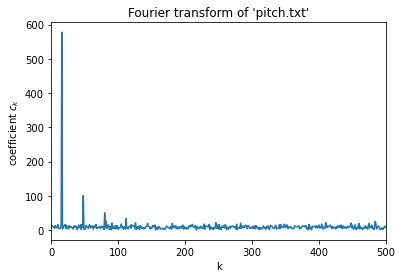

In [13]:
c_fft = np.fft.rfft(y) # transform the original data
                       # note the form of the call -
                       # we're using the numpy rfft routine in the numpy fft submodule

plt.figure()
plt.xlim(0,500)
plt.plot(abs(c_fft))   # plot the absolute coefficients
plt.title("Fourier transform of 'pitch.txt'")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

What you should find is that this calculation is almost instantaneous - but it generates identical results.

# Your tasks

<div class="alert alert-success"> 
<b>Use a new notebook to complete these tasks. 
<br>
Don't forget to comment your code, and to use text cells to describe your procedure, and <i>in particular your results</i>, in terms of the physics and maths involved. 
<br>
Aim for a fully self-contained notebook, including a title, introduction, and conclusions.</b>
</div>

### 1. Transforms of basic functions

Generate and plot the following mathematical functions (n.b. you *don't* need to write these as Python functions), sampled at $N = 1000$ evenly spaced points, and calculate and plot their Fourier coefficients. Use either FFT or the DFT function we created.

1. A square-wave with $f(x) = +1$ for $0 \leq x < 0.5$ and $-1$ for $0.5 \leq x < 1$, over a single period. (Note that, unlike in session 7 where we needed this in the form of a function, this can be done simply in a line or two of code. You just need a 1000-element array with every element = +1 for the first half and -1 for the second half.)
2. A single square pulse defined over the region $0\leq x \leq 1000$, with $f(x) = +1$ for $0 \leq x \leq 10$ and zero elsewhere. In this case you should plot the real part of the coefficients rather than their absolute value. The real part of a complex number c are given by `c.real` (correspondingly, the imaginary parts are `c.imag`)

Comment briefly on the results - are they what you expected? Refer to the standard results you know from PHAS0025 (MMIII).

### 2. Audio samples

For this section, you have each been randomly allocated a selection of audio samples to analyse.

Download the three files named "Sample_X.txt" from Moodle (X represents any letter of the alphabet), and save them in the same folder as your notebook. These files consist of digital samples of musical instruments playing a single note, recorded at a sampling rate of 44.1 kHz.

For each of the three data sets, do the following:
   * Load the data set.
   * Plot the first 2000 points only of the data set
   * On a separate plot, plot a sub-sample of the data every 500th point 
       * Hint: Use array slicing to do this. In particular, note that using an array reference like `myarray[::n]` will extract every $n$-th point from the array named myarray.
   * Use the FFT to calculate the discrete Fourier Transform of each sample, and (again on a new plot) plot the first 10,000 coefficients
   * Use the interactive features of  the  %matplotlib notebook interface to zoom in on the fundamental Fourier coefficient, in order to make an accurate manual determination of the fundamental's Fourier coefficient index $k$.(Remember - the fundamental is not necessarily the largest peak!)
   * The frequency $f$ is related to the Fourier coefficient index $k$ by $$ f = \frac{\nu k}{N}, $$where $\nu$ is the sampling rate and $N$ the total number of sampled data points. What note did the instrument play? Give your answer in Hz - musicians are encouraged to also give the name of the note!
   * For each sample, use text cells to make at least three sensible observations of the characteristics you observe in your plots.
   
   
For no extra marks, but to earn the admiration of the demonstrators - can you guess what instrument is playing each of your three samples just from looking at the data?
    
Again not for credit, but as a challenge for anyone who is interested: It is possible to reconstruct playable .wav files from the sample data, using https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html